# 3.1_Numpy for Data Analysis

## *3.1a Load California dataset*

In [1]:
# pip install scikit-learn
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
dataset = fetch_california_housing() # dict-like object
list(dataset)

['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']

In [2]:
data = dataset['data'][:500] # collect the data
print(type(data), data.shape)

target = dataset['target'][:500]
print(type(target), target.shape)

target[:10]

<class 'numpy.ndarray'> (500, 8)
<class 'numpy.ndarray'> (500,)


array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

## *3.1b California Housing features*

In [3]:
feature_names = dataset['feature_names']
print(type(feature_names), feature_names)

<class 'list'> ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
descriptions = dataset['DESCR']
print(descriptions)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## *3.1c Dataset statistics*

In [5]:
# dataset mean over all features
print(f"Global mean: {data.mean():0.3f}")

# mean of the first feature (MedInc)
print(f"MedInc: {data[:, 0].mean():0.3f}")

Global mean: 116.840
MedInc: 3.264


In [6]:
# mean and std of all features over a specific axis

means = data.mean(axis = 0)
stds = data.std(axis=0)

for name, mu, sigma in zip(feature_names, means, stds):
    print(f"{name:10s}: me {mu:.2f}\t sigma {sigma:.2f}")
    

MedInc    : me 3.26	 sigma 1.83
HouseAge  : me 44.57	 sigma 9.11
AveRooms  : me 4.99	 sigma 1.24
AveBedrms : me 1.07	 sigma 0.10
Population: me 962.55	 sigma 563.21
AveOccup  : me 2.70	 sigma 0.89
Latitude  : me 37.81	 sigma 0.04
Longitude : me -122.23	 sigma 0.04


In [7]:
'''
numpy.unravel_index(indices, shape, order='C')

-> Converts a flat index or array of flat indices into a tuple of coordinate arrays.

'''
import numpy as np
np.unravel_index(3, [3,4])
# this means that the fourth element in a [3,4] matrix has the coordinates (0,3)

(0, 3)

In [8]:
# extreme values

min_idx = np.unravel_index(data.argmin(), data.shape)
max_idx = np.unravel_index(data.argmax(), data.shape)

print(f"Min value: {data[min_idx]} at position {min_idx}")
print(f"Max value: {data[max_idx]} at position {max_idx}")

Min value: -122.34 at position (395, 7)
Max value: 4985.0 at position (283, 4)


## *3.1d Correlation analysis*

In [9]:
# slice() function is not relevant for exam

In [10]:
# Retain only two features, column 2 (average rooms) and 3 (average bedrooms), to analyze.

print("features:", feature_names[2], feature_names[3])

fidx = (slice(None), slice(2,4))
print("data[fidx].shape: ", data[fidx].shape)

features: AveRooms AveBedrms
data[fidx].shape:  (500, 2)


## *3.1e Scatter-plot of two arbitrary dimensions*

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_data(data, title='California Housing data', features=(2, 3), feature_names=None):
    # implicit check for length
    fidx1, fidx2 = features
    
    x_vals = data[:, fidx1]
    y_vals = data[:, fidx2]
    
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.plot(x_vals, y_vals, 'o', color='b', ms=7, label='data') #  X: (506, 2)

    # equiv. with the argument reference ( using unpacking operator )
    # X = X[:, features]
    # plt.scatter(*X.T, color='b', s=20, label='data')

    x_mean = x_vals.mean().round(2)
    y_mean = y_vals.mean().round(2)
    
    ax.plot(x_mean, y_mean, 'X', color='r', ms=20, label=f'mean ({x_mean}, {y_mean})', zorder=3)
    
    x_min, x_max = x_vals.min(), x_vals.max()
    y_min, y_max = y_vals.min(), y_vals.max()
    
    ax.axis([x_min, x_max, y_min, y_max]) # sets axis limits at ones
    ax.plot([x_mean, x_mean], [y_min, y_mean], 'k--')
    ax.plot([x_min, x_mean], [y_mean, y_mean], 'k--')
    
    if feature_names is not None:
        x_lab, y_lab = [feature_names[index] for index in features]
        ax.set_xlabel(x_lab, fontsize=18)
        ax.set_ylabel(y_lab, fontsize=18)
    
    ax.set_title(title, fontsize=25)
    ax.legend(loc='upper right', fontsize=20)
    
    # return the ax object
    return ax

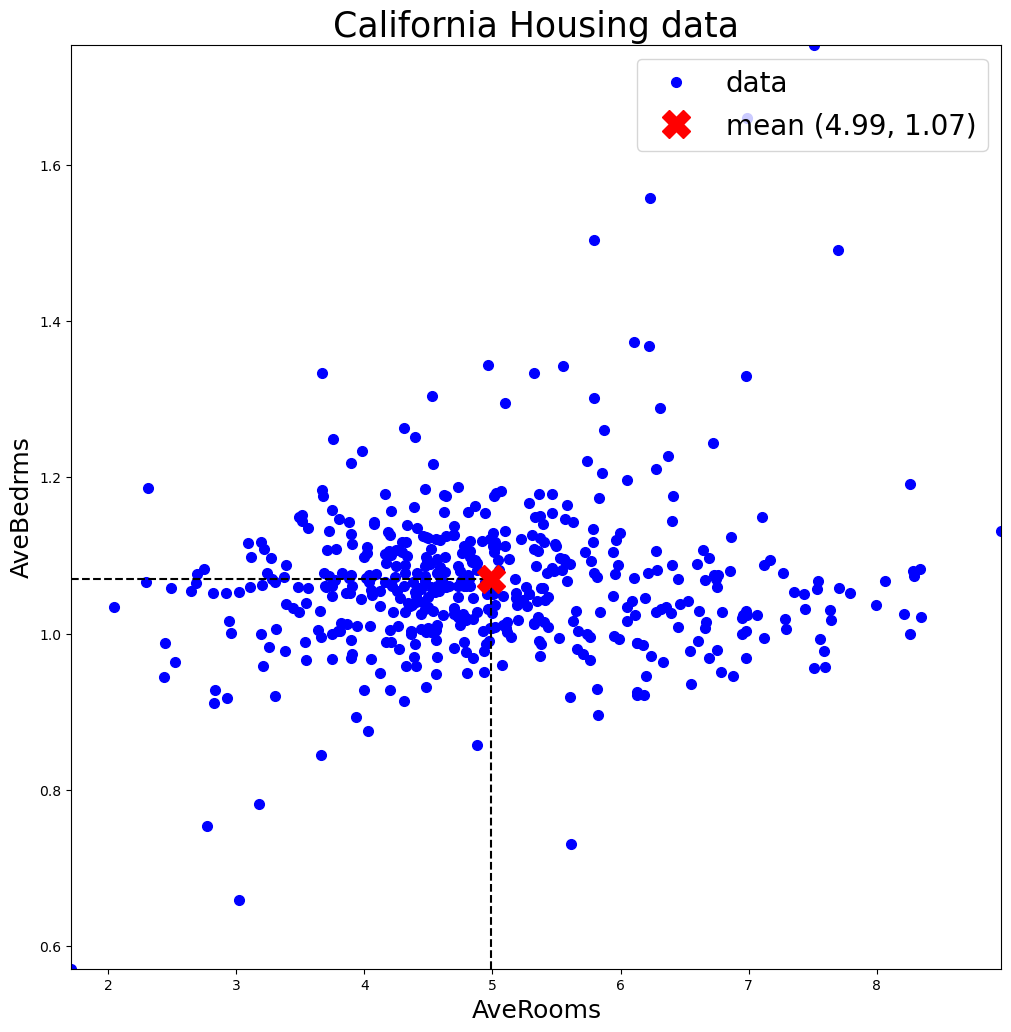

In [12]:
plot_data(data, features=(2, 3), feature_names=feature_names);

## *3.1f Normalize the data*

In [13]:
# (500, 2) -  (500, 1) by the broadcasting

data_norm = data - data.mean(axis=0, keepdims=True) # center around origin (zero-mean)
data_norm = data_norm / data.std(axis=0, keepdims=True)  # rescale features so that they have standard deviation 1 in each dimension

d = data_norm.shape[1]

assert np.allclose(data_norm.mean(0), np.zeros(d), atol=1e-6), 'The data is not numerically zero-mean'
assert np.allclose(data_norm.std(0), np.ones(d)), 'The data is not numerically std-one'

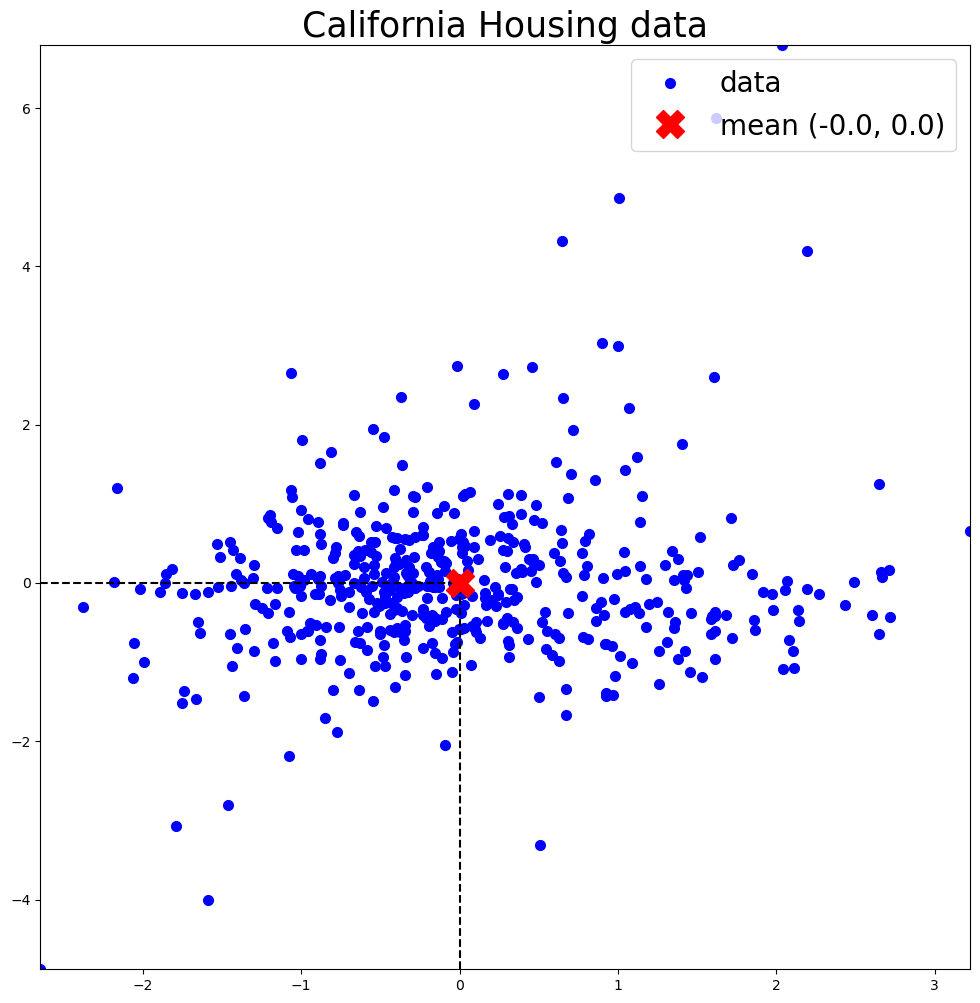

In [14]:
plot_data(data_norm, features=(2, 3));


## *3.1g Computing a pairwise-distance matrix*

In [15]:
import scipy.spatial

cdist = scipy.spatial.distance.cdist(data_norm[fidx], data_norm[fidx], metric='euclidean')
cdist.shape

(500, 500)

In [16]:
# using broadcasting

# (500, 1, 2)  -  (1, 500, 2) -> (500, 500, 2)

manual_cdist = np.sum((data_norm[fidx][:, None] - data_norm[fidx][None]) ** 2, axis=2) ** 0.5

assert np.allclose(cdist, manual_cdist), "Matrix elements aren't the same"

## *3.1h Highlight the neighbouring data points*

In [17]:
from itertools import count

def highlight(data, cdist, min_dist=0.1, title='California Housing data'):
    
    fig, ax = plt.subplots(figsize=(12, 12))
    idx = np.nonzero(cdist < min_dist)
    print(idx)
    
    ax.plot(*data.T, 'o', color='b', ms=5, label='data')
    ax.set_title(title, fontsize=25)
    
    for n, i1, i2 in zip(count(), *idx):
        label = 'neighbours' if n == 0 else None
        if i1 != i2:
            ax.plot(
                [data[i1, 0], data[i2, 0]],  # x-values
                [data[i1, 1], data[i2, 1]],  # y-values 
                color='r',
                alpha=0.55, 
                label=label,
                linewidth=3
            )
    
    ax.legend(loc='best', fontsize=20)
    
    
np.nonzero(np.arange(0,10,1)%2)

(array([1, 3, 5, 7, 9], dtype=int64),)

In [18]:
'''
# MUSS NOCH EINMAL ÜBERARBEITET WERDEN


from itertools import count

def highlight(data, cdist, min_dist=0.1, title='California Housing data'):
    
    fig, ax = plt.subplots(figsize=(12, 12)) #IMPORTANT
    idx = np.nonzero(cdist < min_dist) #IMPORTANT
    print(idx)
    
    ax.plot(*data.T, 'o', color='b', ms=5, label='data') #UNPACKING NOT NECESSARY
    ax.set_title(title, fontsize=25) #IMPORTANT
    
    
    # for n, i1, i2 in zip(count(), *idx):
    label = 'neighbours'
    for n, (i1, i2) in enumerate(zip(*idx)):
        #label = 'neighbours' if n == 0 else None
        if i1 != i2:
            ax.plot(
                [data[i1, 0], data[i2, 0]],  # x-values
                [data[i1, 1], data[i2, 1]],  # y-values 
                color='r',
                alpha=0.55, 
                label=label,
                linewidth=3
            )
            if label:
                label = None
    
    ax.legend(loc='best', fontsize=20)
    
    
# np.nonzero(np.arange(0,10,1)%2)
'''

"\n# MUSS NOCH EINMAL ÜBERARBEITET WERDEN\n\n\nfrom itertools import count\n\ndef highlight(data, cdist, min_dist=0.1, title='California Housing data'):\n    \n    fig, ax = plt.subplots(figsize=(12, 12)) #IMPORTANT\n    idx = np.nonzero(cdist < min_dist) #IMPORTANT\n    print(idx)\n    \n    ax.plot(*data.T, 'o', color='b', ms=5, label='data') #UNPACKING NOT NECESSARY\n    ax.set_title(title, fontsize=25) #IMPORTANT\n    \n    \n    # for n, i1, i2 in zip(count(), *idx):\n    label = 'neighbours'\n    for n, (i1, i2) in enumerate(zip(*idx)):\n        #label = 'neighbours' if n == 0 else None\n        if i1 != i2:\n            ax.plot(\n                [data[i1, 0], data[i2, 0]],  # x-values\n                [data[i1, 1], data[i2, 1]],  # y-values \n                color='r',\n                alpha=0.55, \n                label=label,\n                linewidth=3\n            )\n            if label:\n                label = None\n    \n    ax.legend(loc='best', fontsize=20)\n    \n   

(array([  0,   0,   0, ..., 499, 499, 499], dtype=int64), array([  0, 122, 138, ...,  30, 437, 499], dtype=int64))


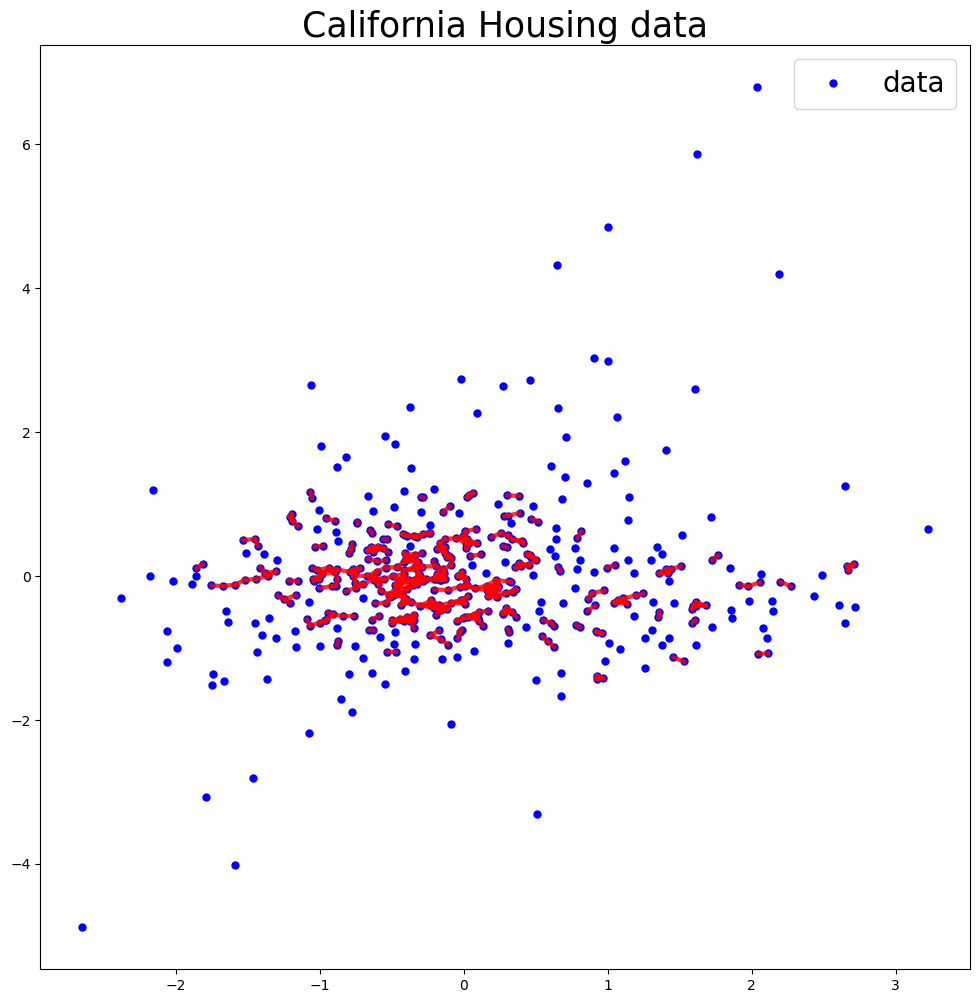

In [19]:
highlight(data_norm[fidx], cdist)

## *3.1k K-Nearest Neighbours Regression (KNNR)*

In [20]:
# splitting into train and test data

def split(data, target, tr_ratio=0.8):
    sp_idx = int(tr_ratio * len(data)) # 80% train 20% test

    data_train = data[:sp_idx]
    target_train = target[:sp_idx]

    data_test = data[sp_idx:]
    target_test = target[sp_idx:]
    
    return data_train, target_train, data_test, target_test

data_train, target_train, data_test, target_test = split(data_norm, target)
data_train.shape, data_test.shape

((400, 8), (100, 8))

In [21]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

knnr = KNNR(n_neighbors=1)
knnr.fit(data_train, target_train)

target_predict = knnr.predict(data_test)

target_predict[:5], target_test[:5]

(array([2.768, 2.614, 2.614, 3.911, 3.911]),
 array([2.613, 2.322, 3.754, 3.573, 3.744]))

## *3.1l Objective (Loss) function*

In [22]:
# compute the root mean squared error (RMSE) for the predicted outputs:

# root mean square error (RMSE)
rmse = np.mean((target_test - target_predict)**2)**0.5
rmse

0.8138914384621575

## *3.1m Linear Algebra*

In [23]:
'''
Many machine learning techniques are often based on concepts from linear algebra like:
   - Trace operator and matrix norms
   - Solving a system of linear equations
   - Singular value decomposition
'''

'\nMany machine learning techniques are often based on concepts from linear algebra like:\n   - Trace operator and matrix norms\n   - Solving a system of linear equations\n   - Singular value decomposition\n'

In [24]:
# machine learning background is not relevant
# but, writing function from mathemical equations could be exam relevant -> coding more important than math

## *3.1n Trace operator*

In [25]:
X = np.random.normal(0, 1, size =(50, 50))

assert np.diag(X).sum() == np.trace(X)

In [26]:
a = 10

A = np.random.normal(0, 1, (10,20))
B = np.random.normal(0, 1, (20,10))
C = np.random.normal(0, 1, (10,10))

assert a == np.trace([[a]]) # scalar

assert np.allclose(np.trace(A) + np.trace(B.T), np.trace(A + B.T)) 

assert np.allclose(np.trace(A @ B @ C),np.trace(C @ A @ B)) # A.dot(B) 
assert np.allclose(np.trace(C @ A @ B),np.trace(B @ C @ A))


## *3.1o Matrix norms*

In [27]:
def l2fro(X):
    return np.trace(X @ X.T) ** 0.5

In [28]:
X = np.random.normal(0, 1, size=(10, 20))

assert np.allclose(l2fro(X), np.linalg.norm(X, ord='fro')) # ord = {'inf', 'nuc', p-norm }

## *3.1p Sum of row vectors with Trace*

In [29]:
X = np.random.normal(0, 10, size=(10,3))
y = np.sum([x @ x for x in X])

print(y, np.trace(X.T @ X))

np.allclose(y, np.trace(X.T @ X), atol = 1e-5)

2113.2082905337224 2113.2082905337224


True

## *3.1q Solving a system of linear equations*

In [30]:
A = [
    [3, 1],
    [1, 2]
]

B = [9, 8]

X = np.linalg.solve(A, B)

print(B, A@ X)

assert np.allclose(A@ X, B)

[9, 8] [9. 8.]


## *3.1r Toy data generation*

In [31]:
# Create a dataset
np.random.seed(42)
N = 200 # number of data points

X = np.random.normal(-1, 3, size=N)

# Targets (outputs) depend on X in some way
def f(x):
    return 0.5 * x + 0.05 * x ** 2 + 0.5

y = f(X)

X = np.stack((X, np.ones_like(X)), axis=1)  # stack flat arrays into new column-axis

print(X.shape, y.shape)

X_range = np.linspace(-10, 10, 500)


(200, 2) (200,)


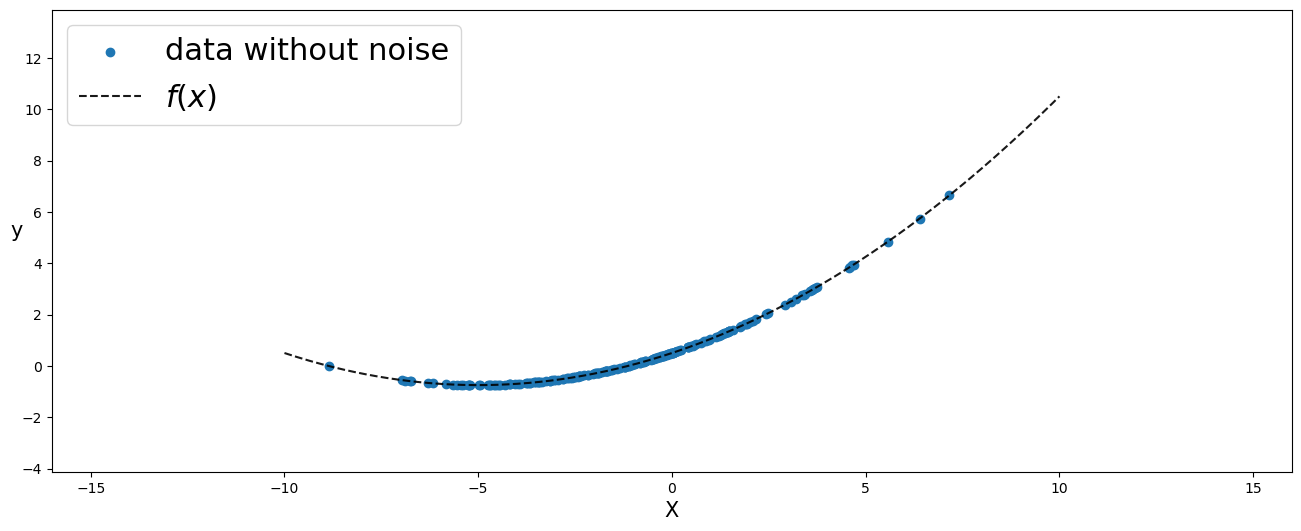

In [32]:
ax = plt.figure(figsize = (16, 6)).gca()

ax.scatter(X[:, 0], y, label='data without noise')
ax.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('y', fontsize=15, rotation=0);
ax.legend(fontsize=22)
ax.margins(0.3)

(200,)
(200,)


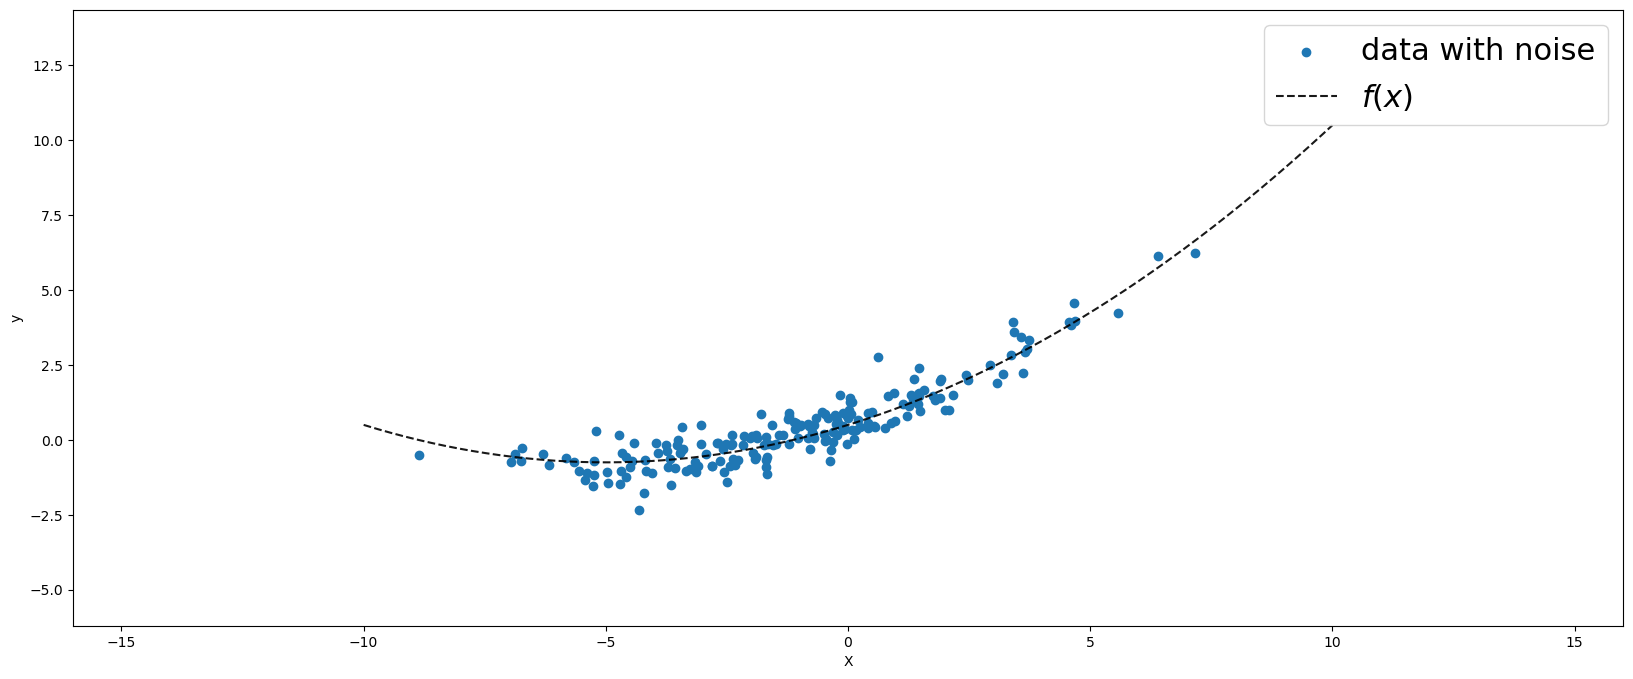

In [33]:
# Add some random noise E_n ~ N(O, sigma^2)

sigma2 = 0.5

eps = np.random.normal(loc=0, scale=sigma2, size=len(y)) # random noise
print(eps.shape)

y += eps # add noise to the targets
print(y.shape)

ax = plt.figure(figsize = (20, 8)).gca()

ax.scatter(X[:, 0], y, label='data with noise')
ax.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')

ax.legend(fontsize=22)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.margins(0.3)

## *3.1s Split dataset randomly into train and test datasets*

In [34]:
# Use a function from sklearn package

from sklearn.model_selection import train_test_split

tr_ratio = 0.2 # percentage 

X_tr, X_te, y_tr, y_te = train_test_split(
    X,
    y, 
    test_size=1 - tr_ratio,  # train_size
    random_state=42,
)

## *3.1t Linear regression analytic solution*

In [35]:
beta = np.linalg.inv(X_tr.T @ X_tr) @ X_tr.T @ y_tr
y_te_predict = X_te @ beta

beta2 = np.linalg.pinv(X_tr) @ y_tr
print(beta)
print(beta2)

[0.40575264 1.06521039]
[0.40575264 1.06521039]


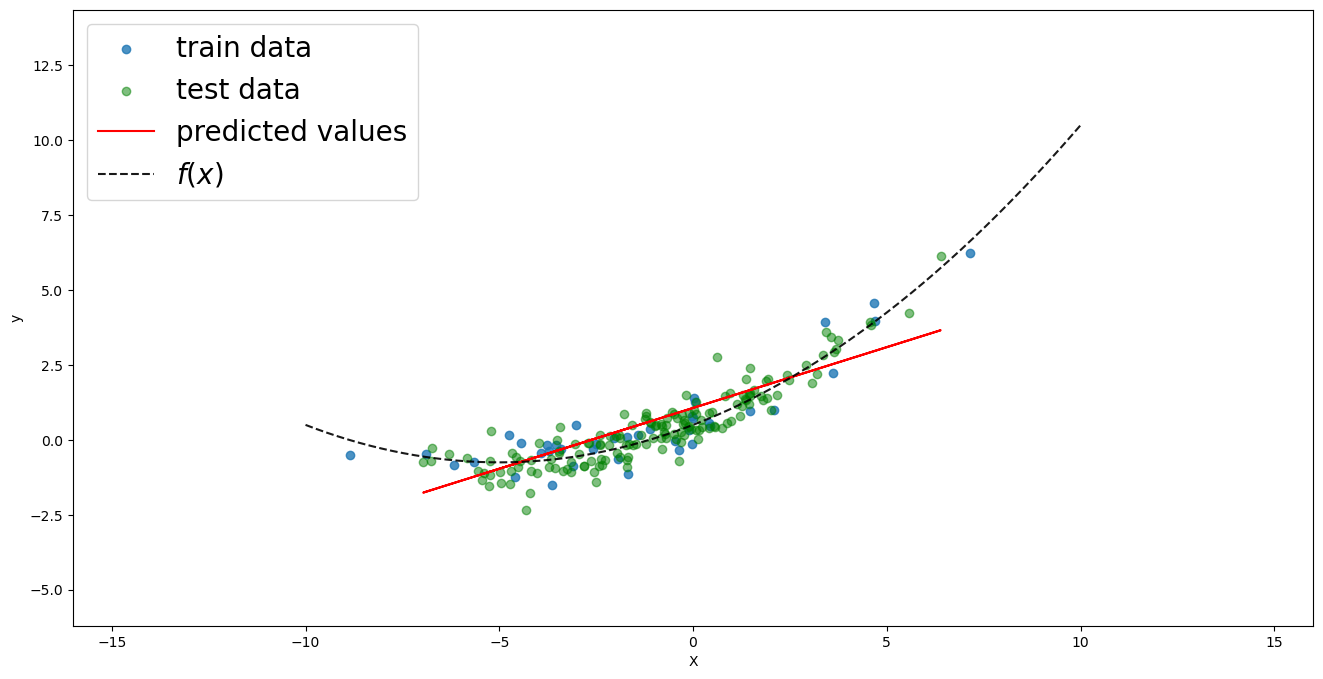

In [36]:
# Plot the data and the prediction
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(X_tr[:, 0], y_tr, alpha=.8, label='train data')
ax.scatter(X_te[:, 0], y_te, color='g', alpha=.5, label='test data')
ax.set_xlabel('X')
ax.set_ylabel('y')

ax.plot(X_te[:, 0], y_te_predict, '-', color='r', label='predicted values')
ax.plot(X_range, f(X_range), 'k--', alpha=0.9, label='$f(x)$')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend(fontsize=20)
ax.margins(0.3)


In [37]:
rmse = np.sqrt(np.square(y_te_predict - y_te).mean())

f"RMSE: {rmse : 0.5f} where y_tr std: {np.std(y_tr) : 0.5f}"

'RMSE:  0.66037 where y_tr std:  1.60425'

In [38]:
from sklearn.metrics import mean_squared_error as mse

f"RMSE: {mse(y_te_predict, y_te, squared=False) : 0.5f}"

'RMSE:  0.66037'

## *3.1u Create a random dataset with correlated feature dependency*

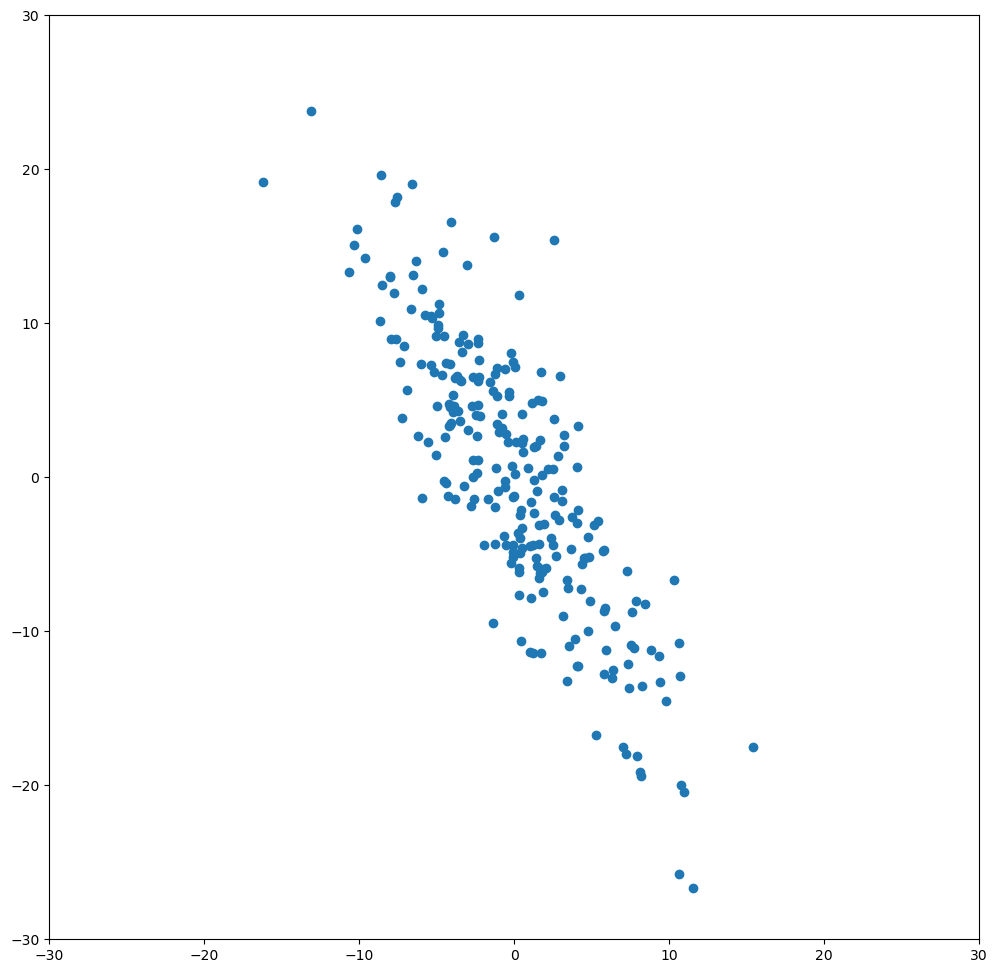

In [39]:
# fixing the random seed
np.random.seed(42)

N = 250
M = np.random.normal(0, 5, (N, 2))

# create some correlation between dimensions
M[:, 1] -= 1.5 * M[:, 0]

# M = np.eye(M.shape[1]) @ M

# Plot the centered dataset
ax = plt.figure(figsize=(12, 12)).gca()
ax.scatter(*M.T)

ax.axis([-30, 30, -30, 30]);


## *3.1v Find the principle components via SVD*

In [40]:
# PCA only applies to centered data, so we center the data

M -= M.mean(axis=0) # d-data

U, sigma, V = np.linalg.svd(M, full_matrices = False)

print(sigma)
print("U shape: ", U.shape)
print("Sigma shape:", sigma.shape)
print("V shape:", V.shape)

X = U @ np.diag(sigma) @ V.T # SVD reconstruction

assert np.allclose(np.sum(M - X) , 0)


[155.77368067  38.53191893]
U shape:  (250, 2)
Sigma shape: (2,)
V shape: (2, 2)


## *3.1w Project any point to the axis representing highest data variance*

In [41]:
proj_1 = np.outer(V[0], V[0]) # 1st component
proj_2 = np.outer(V[1], V[1]) # 2d component

M_test = np.random.uniform(-20, 20, size=(500, 2)) # random test data to project

# Project some test data onto the fisrt principal compenent
M_test_PCA_1 = M_test @ proj_1

# Project some test data onto the second principal compenent
M_test_PCA_2 = M_test @ proj_2

(-30.0, 30.0, -30.0, 30.0)

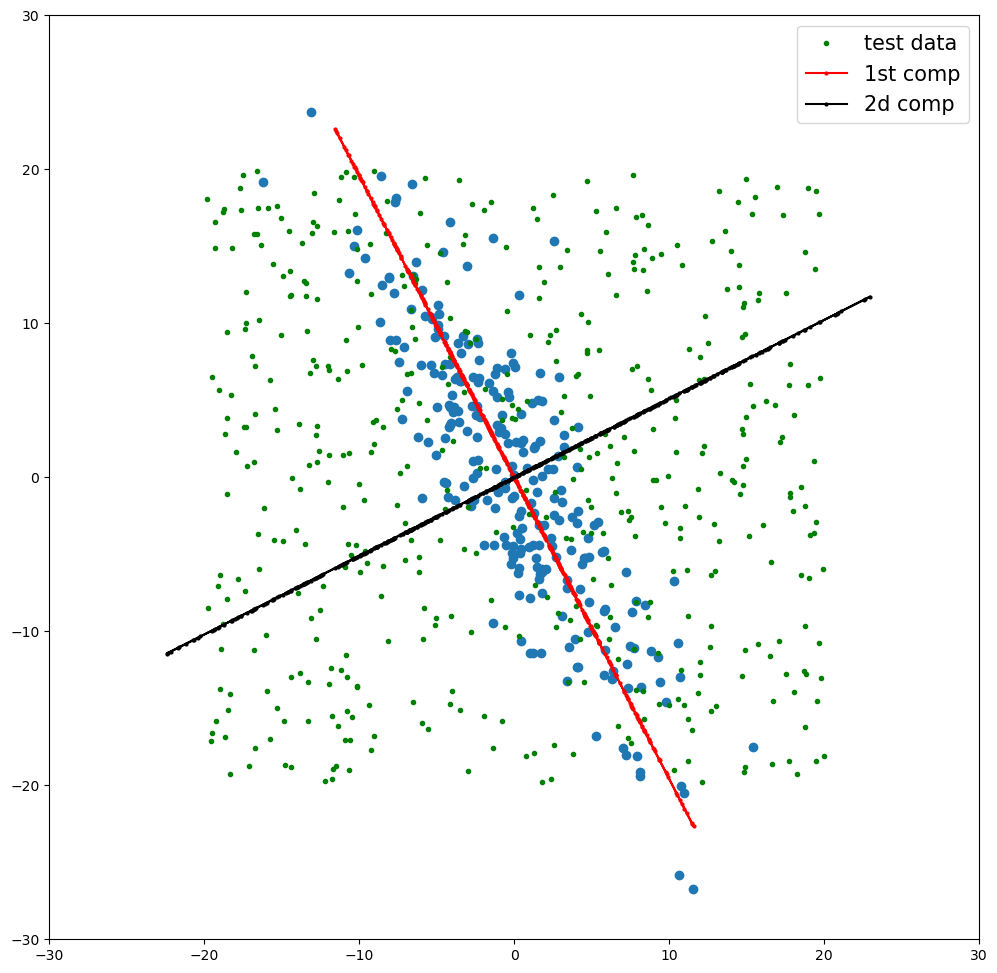

In [42]:
# Plot the original data and the projected test data
ax = plt.figure(figsize=(12, 12)).gca()

ax.scatter(*M.T)  # equivalent to M.T[0], M.T[1]

ax.plot(*M_test.T, '.', color='g', label='test data')
ax.plot(*M_test_PCA_1.T, 'o-', color='r', ms=2, label='1st comp')
ax.plot(*M_test_PCA_2.T, 'o-', color='k', ms=2, label='2d comp')

ax.legend(fontsize=15)
ax.axis([-30, 30, -30, 30])

## *3.1x Sklearn PCA*

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

M = np.random.normal(0, 1, size=(500, 100))

print(M.shape)

pca.fit(M) # N, 100
#print(M_test.shape)

M_pr = pca.transform(M)
M_pr.shape

(500, 100)


(500, 2)

## *3.1y California Housing 2d data representation*

In [44]:
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset again
dataset = fetch_california_housing()

In [45]:
# Normalize the data using StandardScaler

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
norm_data = std_scaler.fit_transform(dataset['data'][:500])

#check if the data is normalized
assert np.allclose(norm_data.mean(0), np.zeros(norm_data.shape[1]))
assert np.allclose(norm_data.std(0), np.ones(norm_data.shape[1]))

In [46]:
# Project the entire Caifornia data on the 2-dim reducted feature space

pca = PCA(n_components=2)
data_proj = pca.fit_transform(norm_data)

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_projected_data(X_proj, targets):

    fig, ax = plt.subplots(figsize=(14, 8))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=1)

    im = ax.scatter(*X_proj.T, cmap="jet", c=targets)
    ax.axis("off")
    ax.set_title("Projected data visualization", fontsize=20)

    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label("Median house value in $1000")

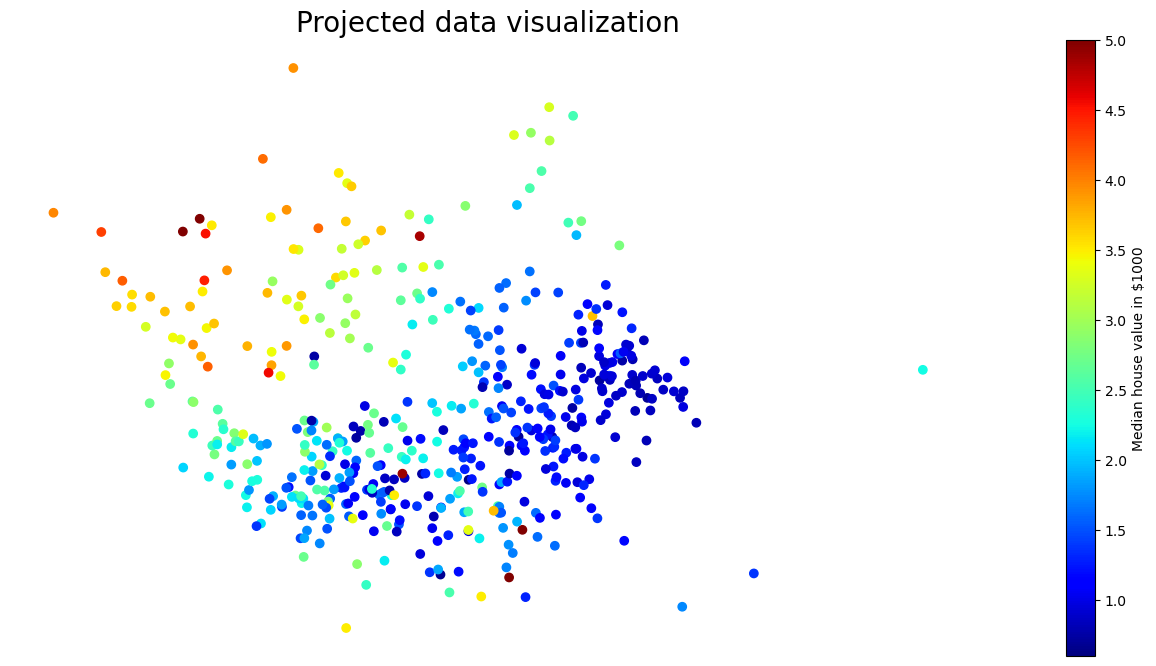

In [48]:
plot_projected_data(data_proj, dataset['target'][:500])